와인등급 다중 분류 신경망 만들기
- 와인의 맛 예측하기 : 11개 변수를 독립변수로 보고 와인의 맛(0~10등급 → 실제 6 등급)을 분류하는 다중 분류 문제로 정의

-

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


데이터 준비하기

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/machinlaur/0729/winequality_red.csv", header=None)
print(data.head())
data.shape

     0     1     2    3      4     5     6       7     8     9    10  11
0   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4   5
1   7.8  0.88  0.00  2.6  0.098  25.0  67.0  0.9968  3.20  0.68  9.8   5
2   7.8  0.76  0.04  2.3  0.092  15.0  54.0  0.9970  3.26  0.65  9.8   5
3  11.2  0.28  0.56  1.9  0.075  17.0  60.0  0.9980  3.16  0.58  9.8   6
4   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4   5


(1599, 12)

데이터셋 생성하기- 입력(속성값 11개)와 출력(판정결과 1개) 변수 분리

In [ ]:
# 변수 분리 -> 입력 11개, 출력 1개
x = data.iloc[:, 0:11].values
y = data.iloc[:, 11].values

#학습/테스트 8:2 비율로 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279, 6)
(320, 6)


In [ ]:
# 레이블을 범주형태로 변경
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y)
Y_encodered = encoder.transform(y)

print(Y_encodered)
Y = np_utils.to_categorical(Y_encodered)

[2 2 2 ... 3 2 3]


데이터셋 전처리하기

In [ ]:
x_mean = np.mean(x_train, axis = 0)
x_std = np.std(x_train, axis = 0)

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [ ]:
print(x_train[0])

[ 0.92482267 -1.00364119  0.72646912 -0.17576208 -0.08162583 -0.46336172
  0.42735915  0.77955288 -0.66688351 -0.92792652 -0.87046345]


모델 구성하기

In [ ]:
np.random.seed(7)

model = Sequential()

model.add(Dense(64, input_shape=(11,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
Total params: 1,626
Trainable params: 1,626
Non-trainable params: 0
_________________________________________________________________


모델 학습과정 설정하기

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

모델 학습시키기

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=200, 
                    batch_size=10,
                    validation_data = (x_test, y_test))

Train on 1279 samples, validate on 320 samples
Epoch 1/200
1279/1279 [==============================] - 1s 397us/step - loss: 1.3561 - accuracy: 0.4808 - val_loss: 1.1838 - val_accuracy: 0.5594
Epoch 2/200
1279/1279 [==============================] - 0s 127us/step - loss: 1.0516 - accuracy: 0.5817 - val_loss: 1.0980 - val_accuracy: 0.5875
Epoch 3/200
1279/1279 [==============================] - 0s 142us/step - loss: 0.9882 - accuracy: 0.5997 - val_loss: 1.0612 - val_accuracy: 0.5906
Epoch 4/200
1279/1279 [==============================] - 0s 139us/step - loss: 0.9543 - accuracy: 0.6130 - val_loss: 1.0495 - val_accuracy: 0.6031
Epoch 5/200
1279/1279 [==============================] - 0s 132us/step - loss: 0.9356 - accuracy: 0.6130 - val_loss: 1.0216 - val_accuracy: 0.6125
Epoch 6/200
1279/1279 [==============================] - 0s 139us/step - loss: 0.9171 - accuracy: 0.6271 - val_loss: 1.0141 - val_accuracy: 0.6125
Epoch 7/200
1279/1279 [==============================] - 0s 132us/step 

학습과정 그리기

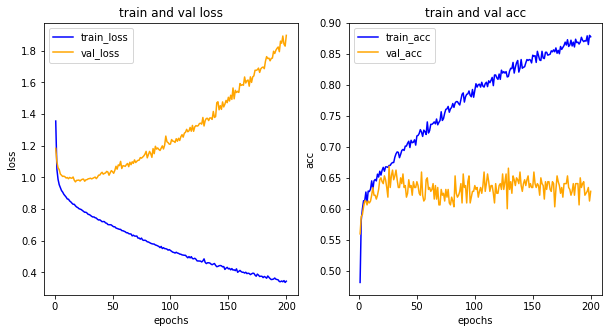

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

모델 평가하기

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

320/320 [==============================] - 0s 45us/step
accuracy: 62.81%


In [ ]:
model.evaluate(x_test, y_test)

320/320 [==============================] - 0s 61us/step


[1.8973767399787902, 0.628125011920929]